In [2]:
import torch
import os
import glob
from IPython.display import Image, display

%cd yolov5
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

C:\Users\swarg\OneDrive\Desktop\New folder\yolov5
Setup complete. Using torch 2.3.1 (CPU)


In [13]:
!python train.py --img 640 --batch 16 --epochs 3 --data ../fire_config.yaml --weights yolov5s.pt --workers 1

train: weights=yolov5s.pt, cfg=, data=../fire_config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\swarg\OneDrive\Desktop\New': No such file or directory
YOLOv5  2024-6-8 Python-3.11.7 torch-2.3.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, wa

In [15]:
from utils.plots import plot_results
plot_results('runs/train/exp/results.csv')

In [16]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../datasets/fire/val/images/

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/fire/val/images/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\swarg\OneDrive\Desktop\New': No such file or directory
YOLOv5  2024-6-8 Python-3.11.7 torch-2.3.1 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/150 C:\Users\swarg\OneDrive\Desktop\New folder\datasets\fire\val\images\0.jpg: 480x640 1 fire, 211.3ms
image 2/150 C:\Users\swarg\OneDrive\Desktop\New folder\datasets\fire\val\images\0016f8c09384627e.jpg: 480x640 1 fire, 163.8ms
image 3/150 C:\Users\swarg\OneDrive\

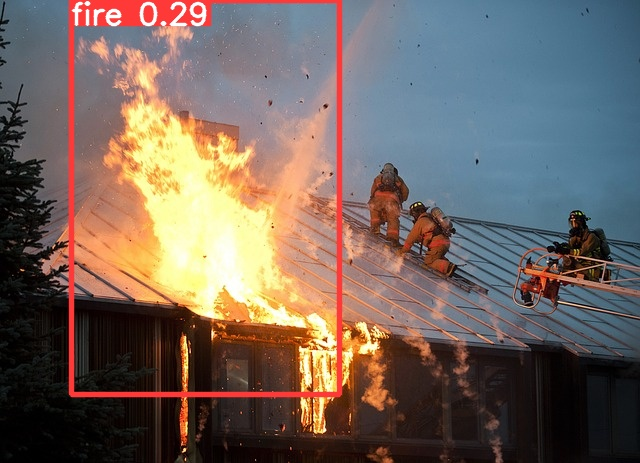

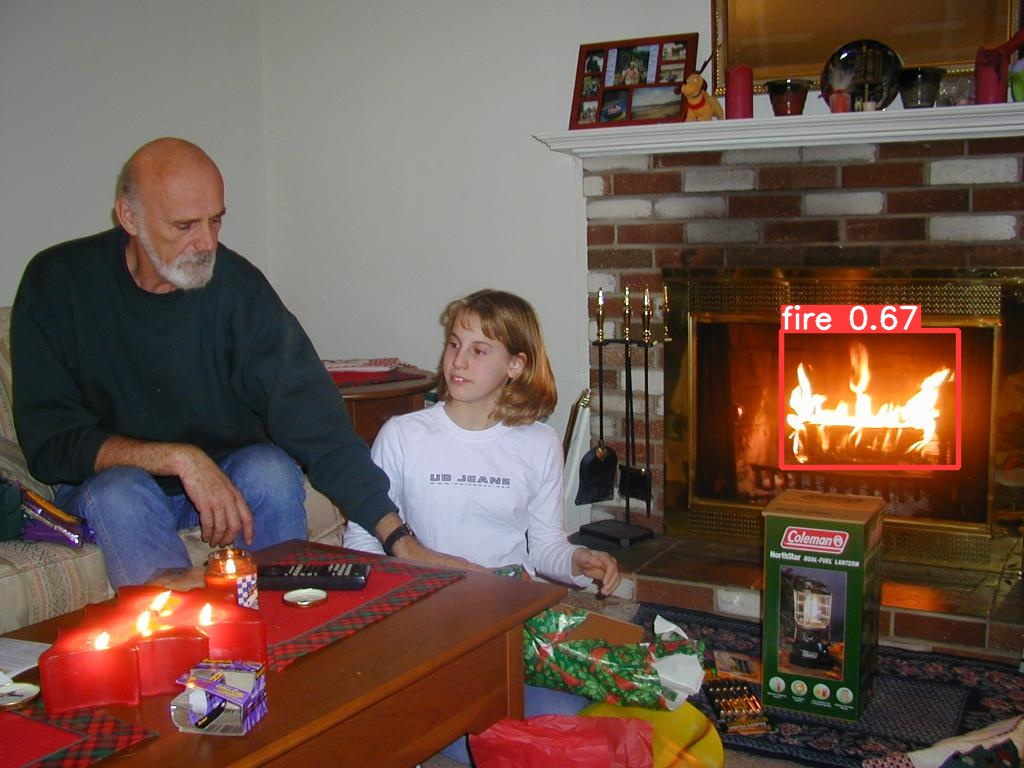

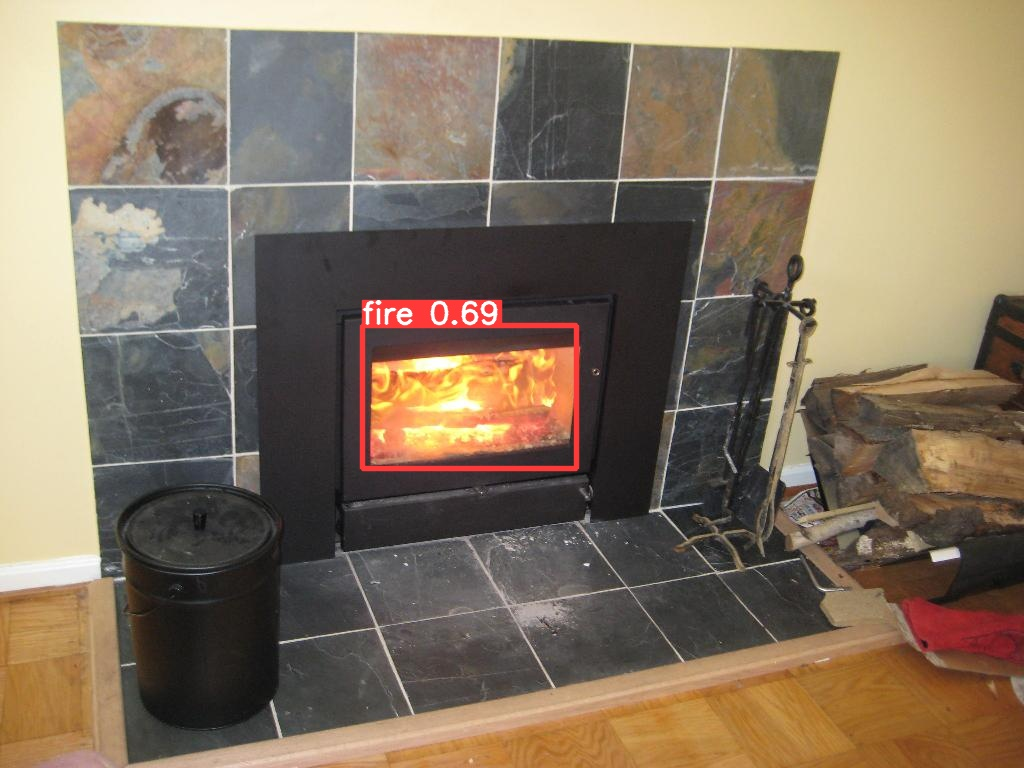

In [33]:
images = glob.glob('runs/detect/exp/*.jpg')

for imageName in images[:3]:
    display(Image(filename=imageName, width=400))

In [37]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../input2.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=../input2.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\swarg\OneDrive\Desktop\New': No such file or directory
YOLOv5  2024-6-8 Python-3.11.7 torch-2.3.1 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/383) C:\Users\swarg\OneDrive\Desktop\New folder\input2.mp4: 384x640 (no detections), 387.7ms
video 1/1 (2/383) C:\Users\swarg\OneDrive\Desktop\New folder\input2.mp4: 384x640 (no detections), 341.1ms
video 1/1 (3/383) C:\Users\swarg\OneDrive\Desktop\New folder\input2.mp4: 384

In [38]:
import cv2
vidcap = cv2.VideoCapture('runs/detect/exp5/input2.mp4')
success,image = vidcap.read()
images = []
while success:
    success,image = vidcap.read()
    if success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

In [1]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt

rc('animation', html='jshtml', embed_limit=1)

def create_animation(ims):
    fig = plt.figure(figsize=(9, 9))
    plt.axis('off')
    im = plt.imshow(ims[0])

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//12)

create_animation(images)

NameError: name 'images' is not defined

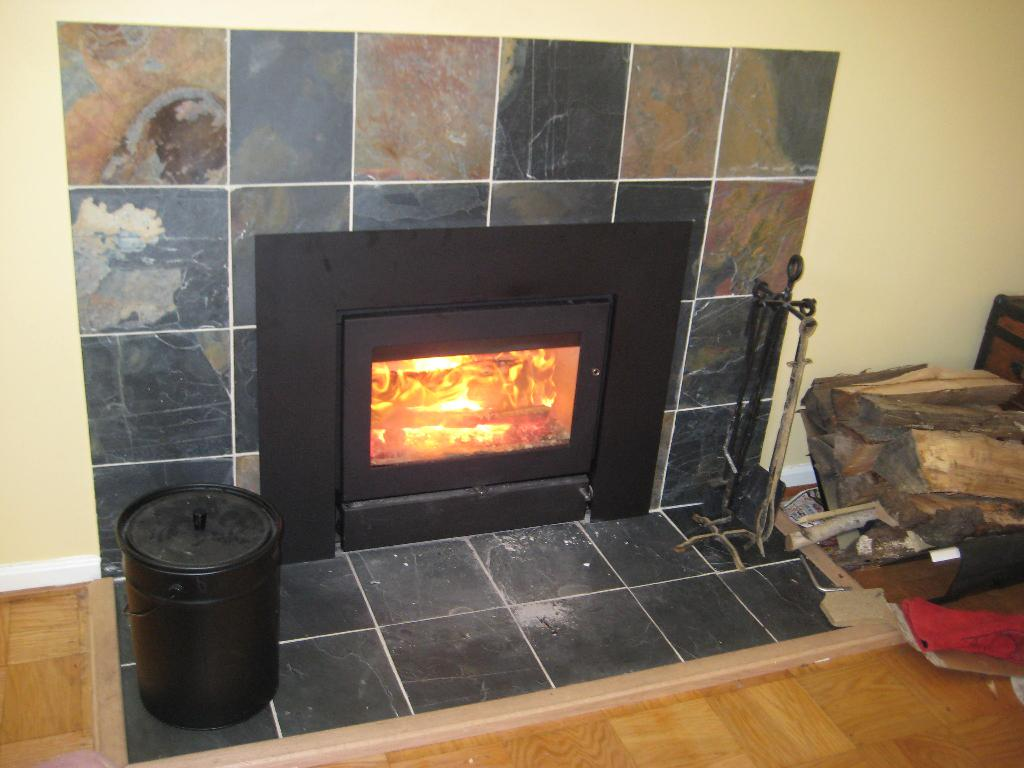

In [31]:
image_path = "../datasets/fire/val/images/004dec94c5de631f.jpg"
display(Image(filename=image_path, width=400))

In [32]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source {image_path} --visualize

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/fire/val/images/004dec94c5de631f.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\swarg\OneDrive\Desktop\New': No such file or directory
YOLOv5  2024-6-8 Python-3.11.7 torch-2.3.1 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Saving runs\detect\exp4\004dec94c5de631f\stage0_Conv_features.png... (32/32)
Saving runs\detect\exp4\004dec94c5de631f\stage1_Conv_features.png... (32/64)
Saving runs\detect\exp4\004dec94c5de631f\stage2_C3_features.png... (32/64)
Saving runs\detect\exp4\0

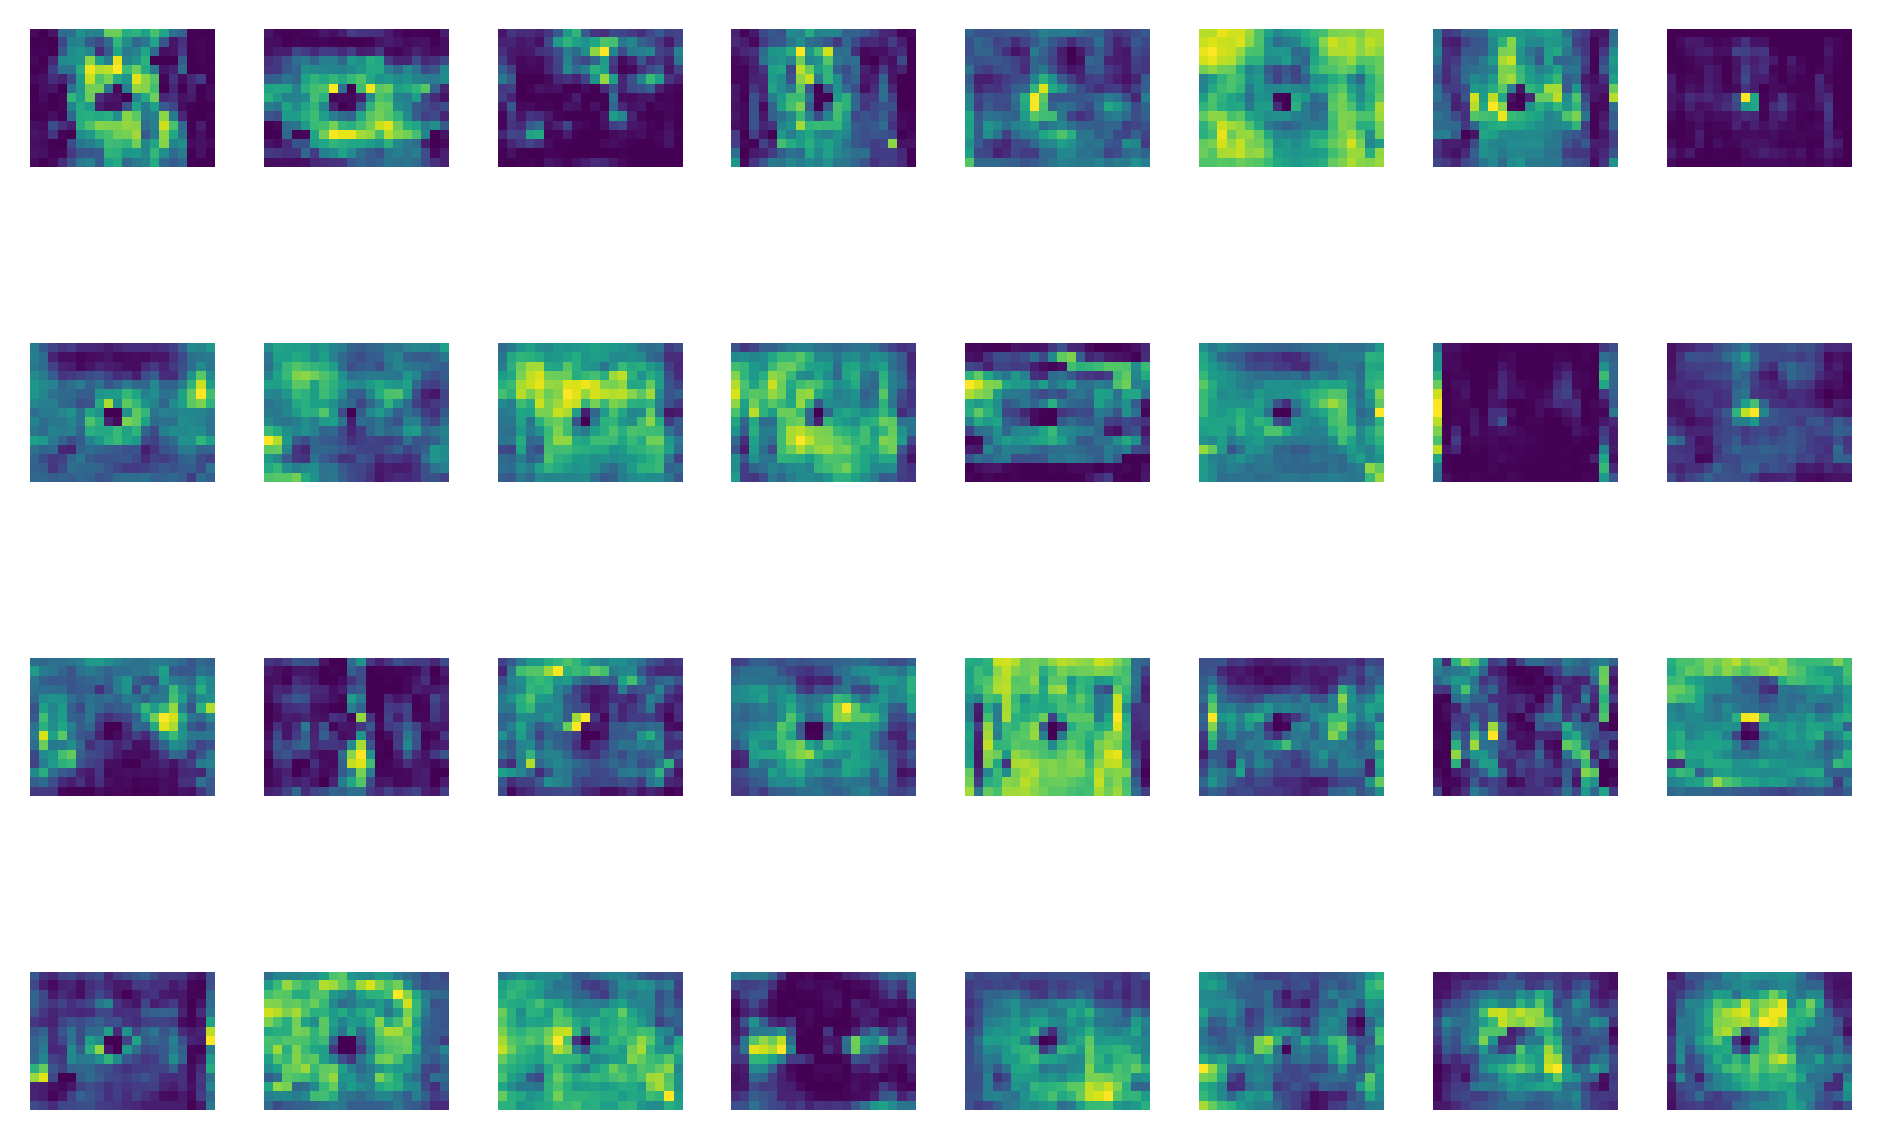

In [34]:
display(Image(filename="runs/detect/exp4/004dec94c5de631f/stage23_C3_features.png"))